#<font color=orage> **Optimizacion Hiperparametros**

---



In [ ]:
#Importamos pandas y el archivo
import pandas as pd
import numpy as np

datos = pd.read_csv("carros.csv")
datos.head()

,precio,vendido,edad_del_modelo,km_by_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [ ]:
#Estos datos de vendido y NO vendido, pueden estar desordenados y nuestro
#MODELO cuando lo apliquemos tardara mucho tiempo en examinarlo, para que no
#suceda esto tenemos que oredenar los valores de Vendido y NO Vendido
#Ordenamos de forma Decreciente por la columna de VENDIDOS-->
datos_ord = datos.sort_values("vendido", ascending=True)
x_ord = datos_ord[["precio", "edad_del_modelo", "km_by_year"]]
y_ord = datos_ord["vendido"]
datos_ord.head()

,precio,vendido,edad_del_modelo,km_by_year
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [ ]:
#Ahora necesitamos saber cual es el menor valor posible que podemos predecir
#a traves del MODELO, para tener una BASE que nos sirve para saber si el proximo
#MODELO aplicado es mejor o peor que la Base anterior que aplicamos
#Las base que usaremos es DUMMYCLASSIFIER-->
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score= False)
media = results["test_score"].mean()
desviacion_estandar = results["test_score"].std()
print("Accuracy con dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))


Accuracy con dummy stratified, 10 = [58.00, 58.00]


In [ ]:
#Ahora vamos a mejorar estos Valores, el proximo MODELO que usaremos es mas
#Avanzado, DESICIONTREECLASSIFIER, modelo de ARBOL y podemos estudiar mejor las
#Variables a traves del PARAMETRO que es es el MAX_DEPTH-->
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier


SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score= False)
media = results["test_score"].mean()
desviacion_estandar = results["test_score"].std()
print("Accuracy con dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))


Accuracy con dummy stratified, 10 = [73.83, 77.73]


In [ ]:
#Vamos a adicionar una nueva Variable, otra categoria, columna MODELO
#Para producir un resultado con esta nueva Variable que nos generara un valor
#ALEATORIO sobre las caracteristicas que ta tenaimos antes-->
np.random.seed(SEED)
datos["modelo"] = datos.edad_del_modelo + np.random.randint(-2, 3, size=10000)
datos.modelo = datos.modelo + abs(datos.modelo.min()) + 1
datos.head()

,precio,vendido,edad_del_modelo,km_by_year,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [ ]:
#Creamos una FUNCION que nos va a traer algunas metricas, algunos indicadores de
#mis datos, de mi modelo-->
def imprime_resultados(results):
 media = results["test_score"].mean() * 100
desviacion = results["test_score"].std() * 100
print("Accuracy media %.2f" % media)
print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))


Accuracy media 0.76
Intervalo [-1.19, 2.70]


In [ ]:
#Ahora vamos a aplicar el Modelo SVC y GROUPKFOLD en PIPELINE con STANDARDSCALER
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacion', scaler), ('estimador', modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score = True)
imprime_resultados(results)


In [ ]:
#Ahora utilizamos un modelo GROUPKFOLD, que es una validacion Cruzada, para analizar
#como se comporta con nuevos GRUPOS-->
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)


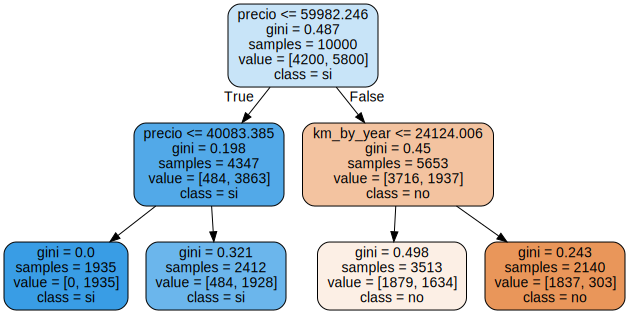

In [ ]:
#Para crear Visualizaciones-->

from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)
features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=["no", "si"], feature_names = features)

graph = graphviz.Source(dot_data)
graph

In [ ]:
#Generamos un modelo de profunidad 3, con MAX_DEPTH
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

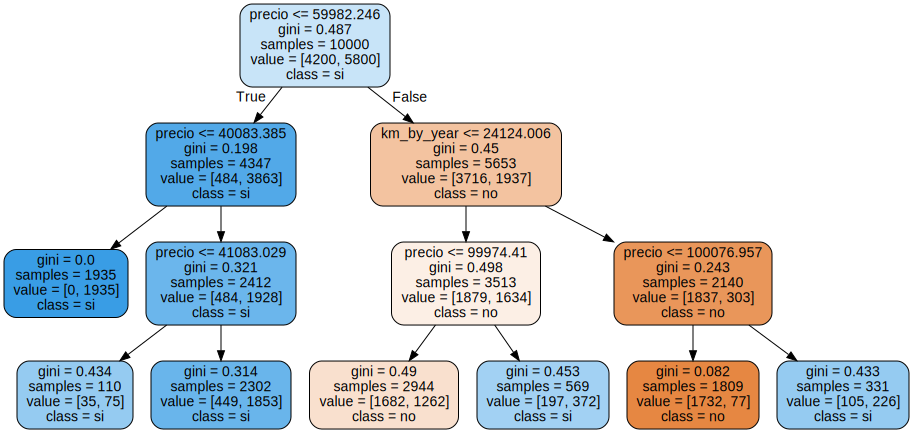

In [ ]:
#Volvemos a generar cuadro
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)
features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=["no", "si"], feature_names = features)

graph = graphviz.Source(dot_data)
graph
#Ejecutamos y tenemos profundidad 3(cuadros gini)

***Probando Parametros***

In [ ]:
#Copiamos el codigo que tiene el arbol y max_depth y lo colocamos dentro de una
#Funcion
def iniciar_arbol_de_decision(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
  test_score = results["test_score"].mean()*100
  print("Arbol max_depth = %d, testing = %.2f" %(max_depth, test_score))


for i in range(1,33):
  iniciar_arbol_de_decision(i)
  #Ejecutamos--> cuanto mas decisiones tenga el arbol,cuanto mas profunda sea
  #mas desiciones tendra que tomar el arbol, cuanto mas informacion tenga mi arbol
  #mas datos tendre para tomar una decision, nuestros datos han entranado tan bien
  #que han olvidado los datos para el mundo real, esto se llama OVERFIT, tenemos
  #que contrarrestar esto

Arbol max_depth = 1, testing = 75.78
Arbol max_depth = 2, testing = 75.78
Arbol max_depth = 3, testing = 78.67
Arbol max_depth = 4, testing = 78.63
Arbol max_depth = 5, testing = 78.56
Arbol max_depth = 6, testing = 78.12
Arbol max_depth = 7, testing = 77.96
Arbol max_depth = 8, testing = 77.86
Arbol max_depth = 9, testing = 77.38
Arbol max_depth = 10, testing = 77.19
Arbol max_depth = 11, testing = 76.97
Arbol max_depth = 12, testing = 76.49
Arbol max_depth = 13, testing = 75.81
Arbol max_depth = 14, testing = 75.66
Arbol max_depth = 15, testing = 75.16
Arbol max_depth = 16, testing = 75.11
Arbol max_depth = 17, testing = 74.74
Arbol max_depth = 18, testing = 74.33
Arbol max_depth = 19, testing = 74.34
Arbol max_depth = 20, testing = 74.22
Arbol max_depth = 21, testing = 73.80
Arbol max_depth = 22, testing = 73.81
Arbol max_depth = 23, testing = 73.38
Arbol max_depth = 24, testing = 73.43
Arbol max_depth = 25, testing = 73.14
Arbol max_depth = 26, testing = 73.04
Arbol max_depth = 27,

In [ ]:
#Optimizacion de un Hiperparametro y el problema de OVERFIT
#Como sabemos si nuestro MODELO esta enfrentandose a un Overfit, para esto
#tenemos que traer en pantalla el resultado de nuestro entrenamiento, para esto
#cambiamos el VALOR de nuestra FUNCION para TRUE-->

def iniciar_arbol_de_decision(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits=10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results["test_score"].mean()*100
  train_score = results["train_score"].mean()*100 #Creamos una Variable(entrenamiento)
  print("Arbol max_depth = %d, training = %.2f, testing = %.2f" % (max_depth, train_score, test_score)) #(mostramos en Training y train_score)
  tabla = [max_depth, train_score, test_score]#Guardamos resultados en un LISTA
  return tabla

resultados = [iniciar_arbol_de_decision(i) for i in range(1,33)]#Llamamos la Funcionde una manera + eficiente
resultados = pd.DataFrame(resultados, columns=["max_depth", "train","test"])#Guardamos en un DataFrame
resultados.head()


Arbol max_depth = 1, training = 75.79, testing = 75.78
Arbol max_depth = 2, training = 75.79, testing = 75.78
Arbol max_depth = 3, training = 78.75, testing = 78.67
Arbol max_depth = 4, training = 78.79, testing = 78.63
Arbol max_depth = 5, training = 78.94, testing = 78.56
Arbol max_depth = 6, training = 79.17, testing = 78.12
Arbol max_depth = 7, training = 79.50, testing = 77.96
Arbol max_depth = 8, training = 79.89, testing = 77.86
Arbol max_depth = 9, training = 80.46, testing = 77.38
Arbol max_depth = 10, training = 81.16, testing = 77.19
Arbol max_depth = 11, training = 82.03, testing = 76.97
Arbol max_depth = 12, training = 82.89, testing = 76.49
Arbol max_depth = 13, training = 83.95, testing = 75.81
Arbol max_depth = 14, training = 85.03, testing = 75.66
Arbol max_depth = 15, training = 86.14, testing = 75.16
Arbol max_depth = 16, training = 87.19, testing = 75.11
Arbol max_depth = 17, training = 88.31, testing = 74.74
Arbol max_depth = 18, training = 89.26, testing = 74.33
A

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


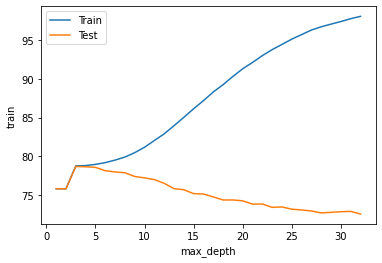

In [ ]:
#Visualizamos lo de arriba de una forma Grafica, Importamos-->
import matplotlib.pyplot as plt
import seaborn as sns

#Creamos grafico de LINEA
sns.lineplot(x="max_depth", y="train", data=resultados)
sns.lineplot(x="max_depth", y="test", data=resultados)
plt.legend(["Train", "Test"])

In [ ]:
#Ahora ordenamos datos de TEST de forma descendente y se ordena de mayor precision
#en ARBOL de Valor 3
resultados.sort_values("test", ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


***Explorando Hiperparametros en 2 Dimensiones***

In [ ]:
#Vamos a aprender como optimizar a traves de Parametros nuestro MODELO de la manera
#correcta,aprovechamos el codigo ya escrito mas arriba del Arbol de Decision y
#utilizamos el MAX_DEPTH y MIN_SAMPLES_LIEF y vamos a recorrer todo el ESPACIO
# de parametros de cada uno de ellos-->
def iniciar_arbol_de_decision(max_depth, min_samples_leaf): #Agregamos el otro parametro
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits=10)
  modelo = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf)#Agregamos el otro parametro
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results["test_score"].mean()*100
  train_score = results["train_score"].mean()*100 #Creamos una Variable(entrenamiento)
  print("Arbol max_depth = %d, min_samples_leaf = %d, training = %.2f, testing = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabla = [max_depth, min_samples_leaf, train_score, test_score]#Guardamos resultados en un LISTA
  return tabla

#Creamos Funcion para mostrar Resultado-->
def buscar():
  resultados = []
  #Recorremos valores MAX_DEPTH y MIN_SAMPLES_LEAF, con un FOR-->
  for max_depth in range(1,32):
    for min_samples_leaf in [31, 64, 128, 256]: #le indicamos que recorra aslgunas POSICIONES(mas rapido en la ejecucion)
      tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
      resultados.append(tabla)

  resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf","train", "test"])
  return resultados

resultados = buscar()
resultados.head()


Arbol max_depth = 1, min_samples_leaf = 31, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 31, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 64, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 31, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 64, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 128, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256, training = 78.75, testing = 78.67
Arbol max_depth = 4, min_samples_leaf = 31, training = 78.

,max_depth,min_samples_leaf,train,test
0,1,31,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,31,75.791169,75.784219


In [ ]:
#Para que me muestre el mejor Resultado ordenado
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
11,3,256,78.750993,78.672633
8,3,31,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633


In [ ]:
#En el analisis anterior aprendimos a recorrer el Espacio de parametros
# de 2 Hiperparametros, el proeblema es que tenemos que recortar algunos
#valores de mi segundo Hiperparametro, el MIN_SAMPLES_LEAF, para que nuestro
#Algoritmo sea mas rapido, la MATRIZ DE CORRELACION, nos ayudaria a tener una
#mujer idea e donde se encontraria la mejor precision de mi MODELO
#MATRIZ DE CORRELACION -->
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,1.429506e-16,0.550698,-0.004480
min_samples_leaf,1.429506e-16,1.000000e+00,-0.402346,0.302602
train,5.506976e-01,-4.023465e-01,1.000000,0.210751
test,-4.479868e-03,3.026020e-01,0.210751,1.000000


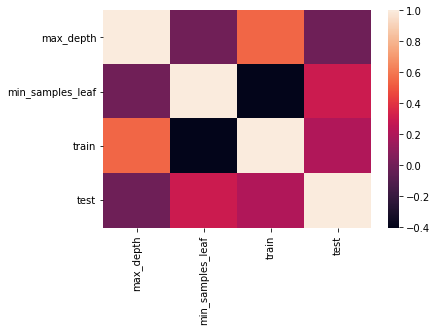

In [ ]:
#otra forma de ver la MATRIZ, con grafico de Seaborn-->
sns.heatmap(corr)

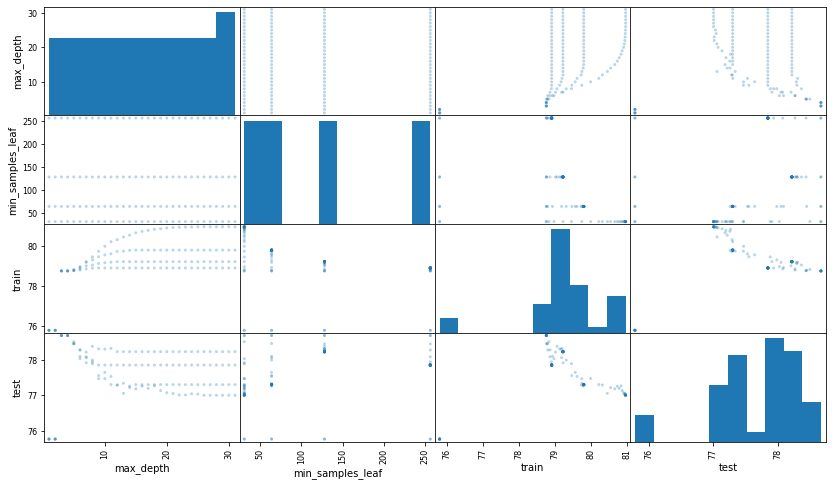

In [ ]:
#otra forma de ver la MATRIZ-->
from pandas.plotting import scatter_matrix
scatter_matrix(resultados, figsize = (14,8), alpha = 0.3);

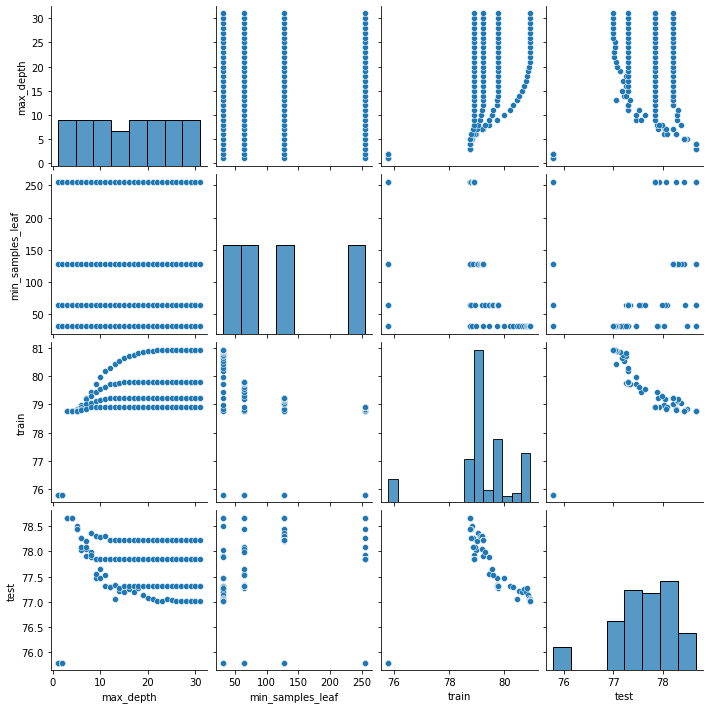

In [ ]:
#otra forma de ver la MATRIZ a traves del grafico
sns.pairplot(resultados)

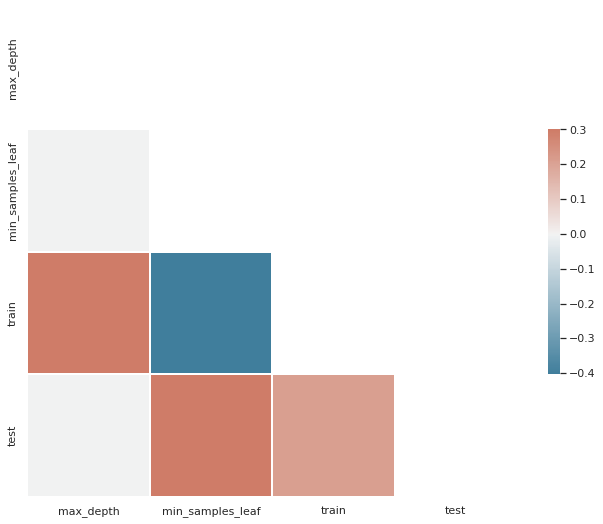

In [ ]:
#Otra forma de ver con SEABORN esta forma de CORRELACION es con SEABORN CORRELACION
#que copiamos y pegamos el codigo de la web

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset(NO LO NECESITAMOS)
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 #columns=list(ascii_letters[26:]))

# Compute the correlation matrix(NO LO NECESITAMOS)
#corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#Copiamos y pegamos nuestra Funcion y vemos la MATRIZ de CORRELACION
#Y cambiamos valores de acuerdo a lo que nos muestra los graficos-->
def buscar():
  resultados = []
  for max_depth in range(1,10):
    for min_samples_leaf in [128,190, 220, 256]:
      tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
      resultados.append(tabla)

  resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf","train", "test"])
  return resultados

resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 190, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 220, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 190, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 220, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 128, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 190, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 220, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256, training = 78.75, testing = 78.67
Arbol max_depth = 4, min_samples_leaf = 128, trainin

,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,190,75.791169,75.784219
2,1,220,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,128,75.791169,75.784219


In [ ]:
#Para que me muestre el mejor Resultado ordenado
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
13,4,190,78.750993,78.672633
11,3,256,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,220,78.750993,78.672633
12,4,128,78.750993,78.672633


***Explorando 3 Dimensiones de Hiperparametros***

In [ ]:
#Para Optimizar el MODELO, vamos a ver si este ALGORITMO funciona con 3 parametros
#Copiamos y Pegamos el ARBOL DE DECISION y agregamos MIN_SAMPLES_SPLITS, que divide
#el NODO o la raglade un arbol de decision en 2, que pasaria si el Nodo lo divido
#en 2 o mas, la PRECISION seria mejor??, tenemos que recorrer todo el Espacio de
#parametros de este Parametro-->
def iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split): #Agregamos el otro parametro
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits=10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)#Agregamos el otro parametro
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results["test_score"].mean()*100
  train_score = results["train_score"].mean()*100 #Creamos una Variable(entrenamiento)
  #Creamos 2 Variables mas para que el resultado no demore al agregar otro Parametro
  fit_time = results['fit_time'].mean() * 100 #tiempo demora de entrenamiento
  score_time = results['score_time'].mean() * 100 #tiempo demora de prueba
  print("Arbol max_depth = %d, min_samples_leaf = %d, min_samples_split = %d training = %.2f, testing = %.2f" % (max_depth, min_samples_leaf, min_samples_split, train_score, test_score))
  tabla = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time,  score_time]#Guardamos resultados en un LISTA
  return tabla

#Creamos Funcion para mostrar Resultado-->
def buscar():
  resultados = []
  #Recorremos valores MAX_DEPTH y MIN_SAMPLES_LEAF, con un FOR-->
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]: #le indicamos que recorra aslgunas POSICIONES(mas rapido en la ejecucion)
       for min_samples_split in [32, 64, 128, 256]:
         tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split)
         resultados.append(tabla)

  resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "min_samples_split", "train", "test", "fit_time", "score_time"])
  return resultados

resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 32 training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 64 training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 128 training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 256 training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 32 training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 64 training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 128 training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 256 training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, min_samples_split = 32 training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, min_samples_split = 64 training = 75.79, 

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.534644,0.144570
1,1,32,64,75.791169,75.784219,0.537181,0.160813
2,1,32,128,75.791169,75.784219,0.565279,0.142477
3,1,32,256,75.791169,75.784219,0.672536,0.190635
4,1,64,32,75.791169,75.784219,0.525815,0.141034


In [ ]:
#Copiamos Variable que nos va almacenar la MATRIZ DE CORRELACION
corr = resultados.corr()


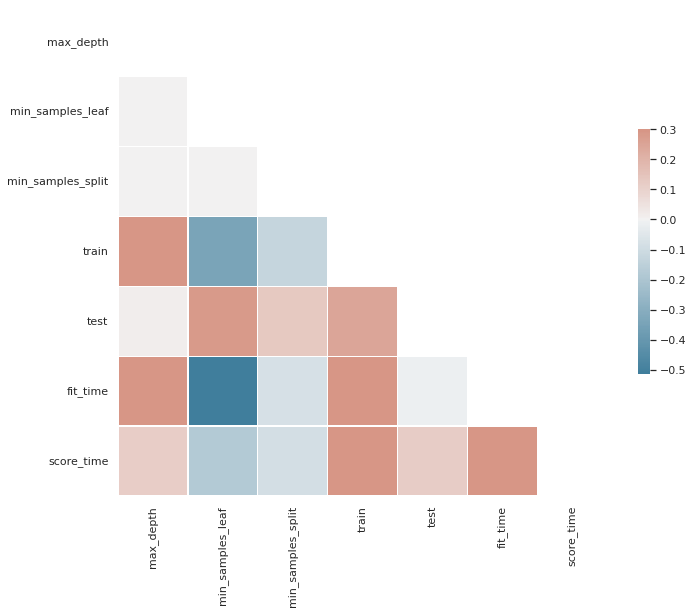

In [ ]:
#Copiamos el grafico de SEABORN, para ver donde se encunatra la CORRELACION mas
#intensa y la mas debil
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Ejecutamos--> nos muestra escala positiva y negativa de acuerdo a colores

In [ ]:
#Valor Descendente, cual fue la mejor convinacion de PRECISION de nuestros
#Hiperparametros
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
63,4,256,256,78.750993,78.672633,1.220341,0.199971
48,4,32,32,78.750993,78.672633,1.258433,0.166929
34,3,32,128,78.750993,78.672633,1.052384,0.150986
35,3,32,256,78.750993,78.672633,1.052735,0.166247
36,3,64,32,78.750993,78.672633,1.037188,0.156987


***Explorando Espacio de Hiperparametros con GridSearchCV***

In [ ]:
#Existe una forma mas sencilla de realizar lo anterior y es la biblioteca SKLEARN que
#nos ofrece el metodo GRIDSEARCHCV, realiza los mismo que el ALGORITMO que nosotros
#creamos pero ya esta implementado para realizar esto de una forma automatica, simplemente
#tenemos que pasarle valores que deceamos que sean explorados para cada Parametro o HiperparametrO
#y este metodo realizara una busqueda sobre todos los valores
#Vamos a importar -->
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)
#Definimos Parametros que vamos a utilizar-->
espacio_de_parametros = {"max_depth":[3,5],
                         "min_samples_split":[32,64,128],
                         "min_samples_leaf":[32,64,128],
                         "criterion":["gini", "entropy"]
}
#Creamos Variable Buscar-->
buscar = GridSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      cv = GroupKFold(n_splits=10))
#Ahora entrenamos el MODELO-->
buscar.fit(x_ord, y_ord, groups = datos.modelo)
#Guardamos el Resultado en un DATAFRAME-->
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010616,0.000695,0.001596,0.000083,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.010396,0.000323,0.001633,0.000133,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.010301,0.000318,0.001539,0.000091,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.010564,0.000883,0.001561,0.000110,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.010763,0.000677,0.001712,0.000265,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [ ]:
#Cual fue el resultado de mi MODELO GridSearchCV ??
print(buscar.best_params_)
#Ejecutamos--> Mejor Convinacion de Parametros con sus Valores, con la cual obtuve
#la mejor PRECISION de mi MODELO

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}


In [ ]:
#Para ver el mejor SCORE(tiempo)
print(buscar.best_score_ * 100)
#El mejor SCORE fue de 78.67 con la convinacion de los valores de arriba

78.67263337284332


In [ ]:
#Como puedo accesar al MODELO en si ??, creamos una Variable e invocamos el MODELO
mejor = buscar.best_estimator_
mejor
#Nos devuelve el MODELO y todas las convinaciones utilizadas que nos devolvio la
#mejor PRECICION o performance

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [ ]:
#Vamos a realizar la PREDICCION a treves de este MODELO
#Importamos METRICS, ACCURACY_SCORE
from sklearn.metrics import accuracy_score

prediccion = mejor.predict(x_ord)
accuracy = accuracy_score(prediccion, y_ord) * 100
print("Accuracy para los Datos fue %.2f%%" % accuracy)
#Ejecutamos --> y el accuracy para nuestro Modelo fue de 78.75

Accuracy para los Datos fue 78.75%


***Nested Cross Validation***
 (Escenario Real, ultimo paso para asegurar que hemos OPTIMIZADO nuestro MODELO a traves de HIPERPARAMETROS)

In [ ]:
#En un escenario Real el ESTIMADOR que usamos en GridSearchCV, NO nos traera los
#resultados o PRECISION final, porque si estamos utilizando Opimizacion a traves de
#Hiperparametros y utilizamos GridSearchCV, es necesario realizar nuevamente una
#Validacion Cruzada encima del mejor MODELO que encontramos en el GridSearchCV,
#entonces debemos utilizar el Metodo CROSS_VAL_SCORE, que es un DOBLE validacion
#cruzada encima de nuestro MODELO(NESTED CROSS-VALIDATION)
#Copiamos la PRIMER funcion de GridSearchCV y pegamos la que fue la primera y que
#realiza nuestra Validacion Cruzada y la modificamos-->
#Importamos KFOLD, ya que CROSS_VAL_SCORE NO acepta el GROUPKFOLD-->
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)
#Definimos Parametros que vamos a utilizar-->
espacio_de_parametros = {"max_depth":[3,5],
                         "min_samples_split":[32,64,128],
                         "min_samples_leaf":[32,64,128],
                         "criterion":["gini", "entropy"]
}
#Creamos Variable Buscar-->
buscar = GridSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      cv = KFold(n_splits= 5, shuffle= True))
#Ahora entrenamos el MODELO-->
buscar.fit(x_ord, y_ord)
#Guardamos el Resultado en un DATAFRAME, borramos los grupos porque no utilizamo GroupKFold-->
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()
#Ejecutamos--> Y nos da la PRIMERA VALIDACION CRUZADA

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.036037,0.008447,0.005045,0.003998,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.025429,0.013965,0.002982,0.000126,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.017686,0.003660,0.004841,0.003391,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.026968,0.009983,0.006138,0.006127,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.013758,0.000288,0.005120,0.002795,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [ ]:
#Ahora aplicamos la SEGUNDA VALIDACION CRUZADA
#Importamos CROSS_VAL_SCORE -->
from sklearn.model_selection import cross_val_score
#Guardamos el resultado de la segunda validacion cruzada y mostramos los nuevos
#score encima de mi mejor MODELO-->
scores= cross_val_score(buscar, x_ord, y_ord, cv = KFold(n_splits = 5, shuffle = True))
scores
#Ejecutamos --> y nos muestra las 5 PREDICCIONES (particiones) de este MODELO

array([0.7795, 0.7905, 0.786 , 0.791 , 0.788 ])

In [ ]:
#Creamos la FUNCION --> IMPRIME_SCORE, que selecciona los Score y crea una Media
# y una Desviacion Standar
def imprime_score(scores):
  media = scores.mean() * 100
  desviacion = scores.std() * 100
  print("Acurracy media %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [ ]:
#Invocamos la FUNCION -->
imprime_score(scores)
#Ejecutamos --> y nos muestra el valor de ACCURACY REAL de los DATOS REALES (Precision Real)

Acurracy media 78.70
Intervalo [77.87, 79.53]


In [ ]:
#Vamos a mostrar en pantalla el mejor del mejor-->
mejor = buscar.best_estimator_
mejor
#Ejecutamos--> Nos devuelve el ARBOL  de DECISION

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

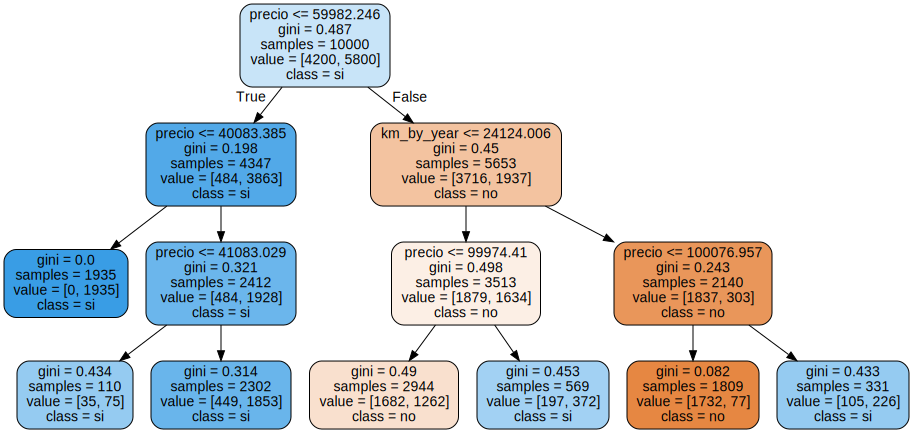

In [ ]:
#Vamos a mostrar el ARBOL-->
features = x_ord.columns
dot_data = export_graphviz(mejor, out_file = None, filled = True, rounded = True, class_names = ["no", "si"], feature_names = features)

graph = graphviz.Source(dot_data)
graph
#Ejecutamos--> SE CUMPLE EL MISMO ARBOL QUE CON EL NUEVO MODELO Y QUE TIENE
#RELACION CON NUESTRO MEJOR MODELO!!